### Monte Carlo - Forecasting Stock Price - INFY

In [8]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm
from datetime import datetime 
import nsepy as nse
%matplotlib inline

In [9]:
from nsepy import get_history
from datetime import date

In [12]:
tickers = ['INFY']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = nse.get_history(t, index = False, start = date(2018, 1, 1), end = date(2023, 3, 24))['Close']

In [13]:
sec_data

,INFY
Date,
2018-01-01,1033.55
2018-01-02,1029.70
2018-01-03,1021.30
2018-01-04,1015.40
2018-01-05,1012.00
...,...
2023-03-20,1403.65
2023-03-21,1390.70
2023-03-22,1389.25


In [14]:
log_returns = np.log(sec_data.pct_change()+1)
log_returns

,INFY
Date,
2018-01-01,NaN
2018-01-02,-0.003732
2018-01-03,-0.008191
2018-01-04,-0.005794
2018-01-05,-0.003354
...,...
2023-03-20,-0.012074
2023-03-21,-0.009269
2023-03-22,-0.001043


<AxesSubplot:xlabel='Date'>

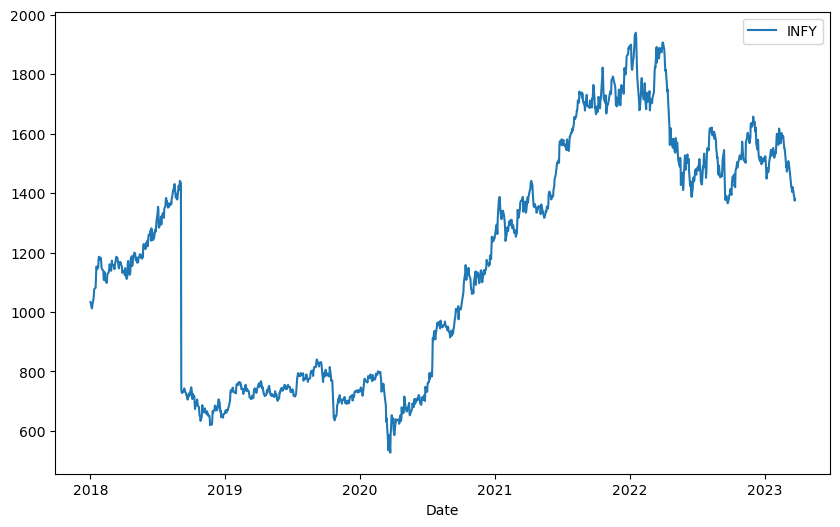

In [15]:
sec_data.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

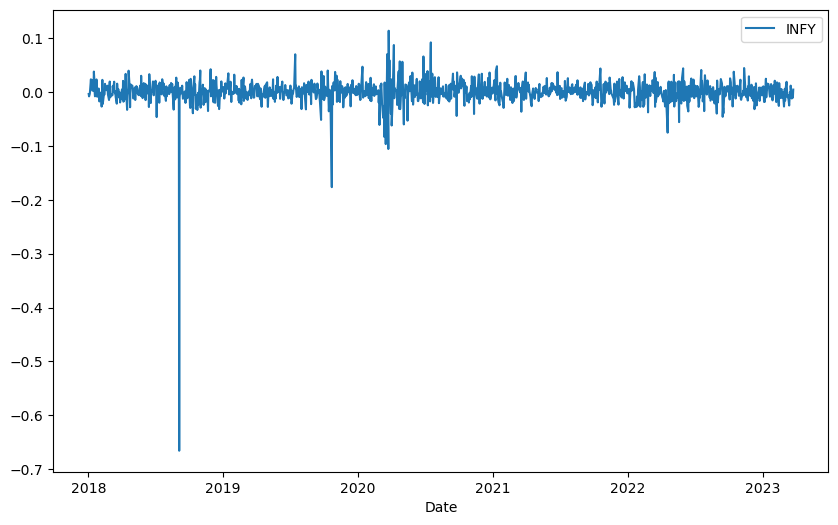

In [16]:
log_returns.plot(figsize=(10,6))

In [17]:
u = log_returns.mean()
u

INFY    0.000223
dtype: float64

In [18]:
var = log_returns.var()
var

INFY    0.000669
dtype: float64

In [19]:
drift = (u - 0.5*var)
drift

INFY   -0.000111
dtype: float64

In [20]:
stdev = log_returns.std()
stdev

INFY    0.025859
dtype: float64

In [21]:
np.array(drift)

array([-0.00011092])

In [22]:
drift.values

array([-0.00011092])

In [23]:
stdev.values

array([0.02585878])

In [24]:
t_intervals = 1000
iterations = 10

In [25]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[0.97169593, 1.01758128, 1.01966458, ..., 1.03126155, 1.0025999 ,
        1.0526861 ],
       [0.9581213 , 0.95839432, 1.00582017, ..., 0.97604146, 1.02190779,
        1.04109153],
       [0.99949904, 0.98761425, 0.9960667 , ..., 0.95810763, 0.9821281 ,
        0.97845448],
       ...,
       [0.99205892, 0.97588496, 1.01886996, ..., 0.98494011, 0.99174931,
        0.96900789],
       [1.00209856, 1.05396803, 1.03388755, ..., 0.9869302 , 0.98659919,
        0.99422707],
       [1.01397218, 0.99547697, 0.92774006, ..., 0.99204326, 0.96652284,
        0.97429305]])

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [26]:
S0 = sec_data.iloc[-1]
S0

INFY    1380.65
Name: 2023-03-24, dtype: float64

In [27]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
price_list[0] = S0
price_list

array([[1380.65, 1380.65, 1380.65, ..., 1380.65, 1380.65, 1380.65],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [29]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

price_list

array([[1380.65      , 1380.65      , 1380.65      , ..., 1380.65      ,
        1380.65      , 1380.65      ],
       [1322.8301726 , 1323.20712095, 1388.68561202, ..., 1347.57164814,
        1410.89699393, 1437.38301511],
       [1322.16748579, 1306.81821022, 1383.22349363, ..., 1291.11867381,
        1385.68158926, 1406.41384736],
       ...,
       [ 510.2958668 , 1658.43467835, 1875.30716898, ..., 2025.62940782,
        1178.65783361,  890.83600597],
       [ 511.36675141, 1747.93713172, 1938.85673079, ..., 1999.15483297,
        1162.86286329,  885.69327638],
       [ 518.51166112, 1740.03115914, 1798.75506119, ..., 1983.24807344,
        1123.93351503,  862.9248062 ]])

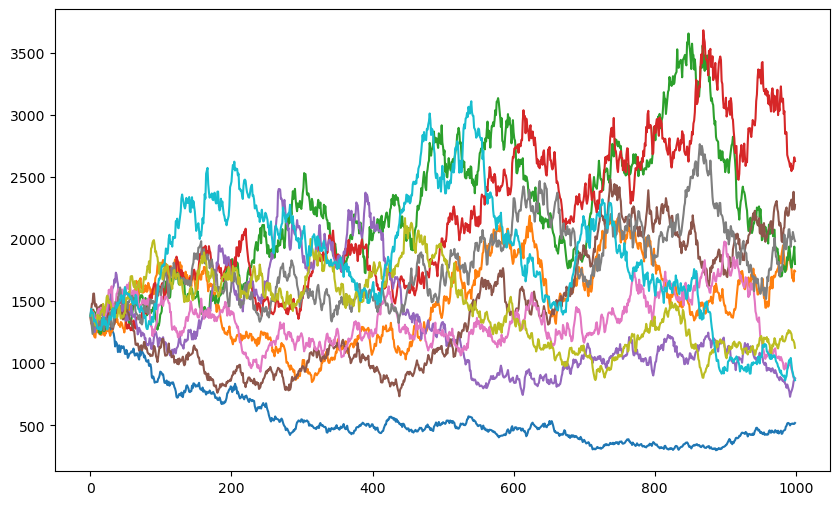

In [30]:
plt.figure(figsize = (10,6))
plt.plot(price_list)